In [1]:
import numpy as np
import pandas as pd
from matplotlib.finance import candlestick2_ohlc
import json
import matplotlib.pyplot as plt
%matplotlib inline

/Users/peisuke/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import pickle

In [3]:
with open('output/test_00029000.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
val_open = [d['Open'] for d in data]
val_high = [d['High'] for d in data]
val_low = [d['Low'] for d in data]
val_close = [d['Close'] for d in data]
action = [d['Action'] for d in data]
stock = [d['Stock'] for d in data]

In [5]:
buy_position = [n for n, (a, s) in enumerate(zip(action, stock)) if a == 1 and s == 0]
sell_position = [n for n, (a, s) in enumerate(zip(action, stock)) if a == 1 and s == 1]

In [6]:
buy_price = np.array(val_open)[buy_position].tolist()
sell_price = np.array(val_open)[sell_position].tolist()

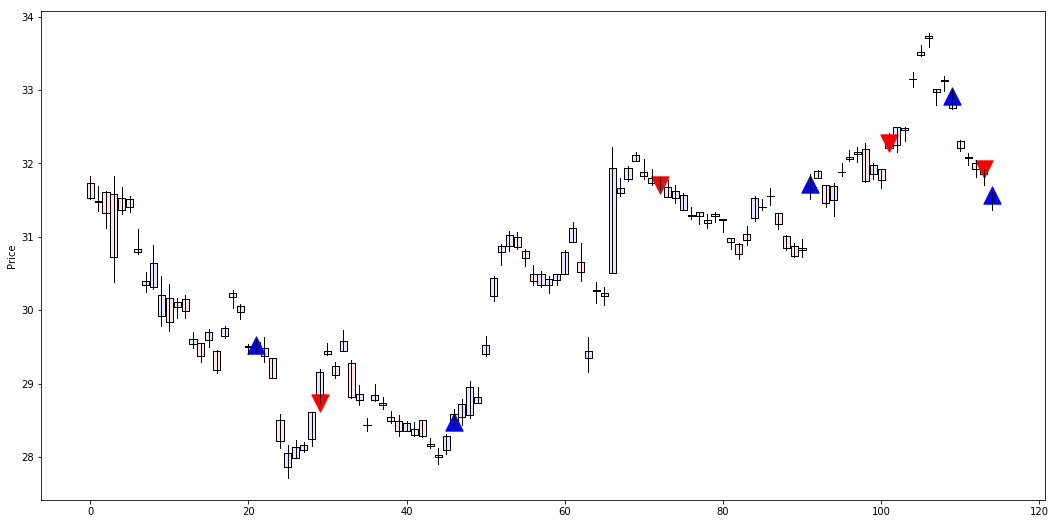

In [7]:
# ローソク足をプロット
fig = plt.figure(figsize=(18, 9))
ax = plt.subplot(1, 1, 1)
candlestick2_ohlc(ax, val_open, val_high, val_low, val_close, width=0.9, colorup="b", colordown="r", alpha=0.1)
ax.set_ylabel("Price")

ax.scatter(buy_position, buy_price, marker='^', c='blue', s=300)
ax.scatter(sell_position, sell_price, marker='v', c='red', s=300)

plt.show()

In [8]:
with open('output/log.json', 'r') as f:
    log = json.load(f)

In [9]:
train_R = [item['train/asset'] for item in log if 'train/R' in item]
train_q = [item['average_q'] for item in log if 'train/R' in item]
val_R = [item['validation/asset'] for item in log if 'validation/R' in item]
val_q = [item['average_q'] for item in log if 'validation/R' in item]

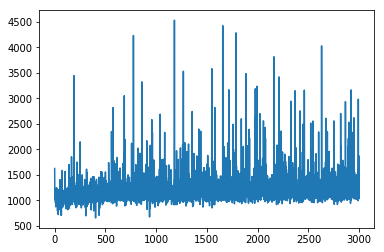

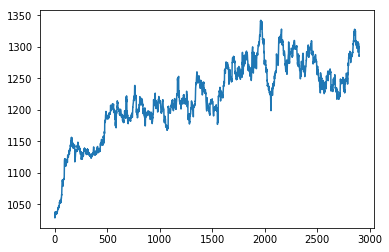

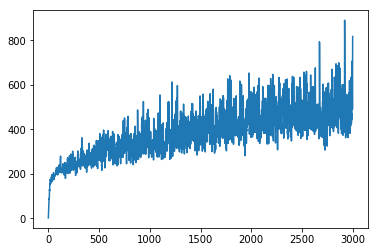

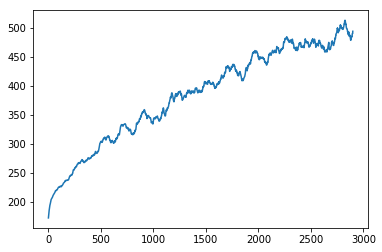

In [10]:
plt.plot(train_R)
plt.show()
plt.plot(np.convolve(train_R, np.array([0.01] * 100), mode='valid'))
plt.show()
plt.plot(train_q)
plt.show()
plt.plot(np.convolve(train_q, np.array([0.01] * 100), mode='valid'))
plt.show()

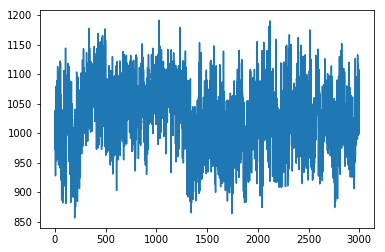

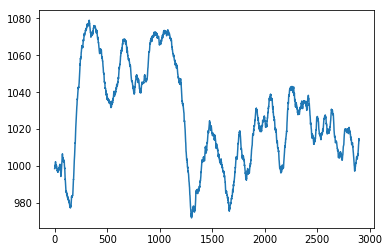

In [11]:
plt.plot(val_R)
plt.show()
plt.plot(np.convolve(val_R, np.array([0.01] * 100), mode='valid'))
plt.show()